<a href="https://colab.research.google.com/github/ThomasTranGithub/6.6.23.Algo.Trading.Strategies/blob/main/standard_deviation_buysellsignals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This project is done by python markdown notebook but the runtime type is in R for data analysis purposes
#If running in colab change runtime to R

Modern Financial Markets and Price Dynamics

In [17]:
#load packages

install.packages('quantmod')
install.packages('PerformanceAnalytics')

library(quantmod)
library(xts)
library(zoo)
library(TTR)
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘PerformanceAnalytics’


The following object is masked _by_ ‘.GlobalEnv’:

    prices


The following object is masked from ‘package:graphics’:

    legend




In [1]:
# Install and load the necessary packages
install.packages("quantmod")
library(quantmod)

# Define the stock symbols
symbols <- c("AAPL", "GOOG", "MSFT", "NFLX")

# Specify the start and end dates
start_date <- "2017-01-01"
end_date <- Sys.Date()  # Set it to today's date

# Fetch the historical data
getSymbols(symbols, from = start_date, to = end_date)

# The data will be stored in separate xts objects with the stock symbols as names
# For example, AAPL's data will be stored in the object named AAPL

# Access the loaded data for each stock
AAPL <- Cl(AAPL)  # Closing prices for Apple (AAPL)
GOOG <- Cl(GOOG)  # Closing prices for Google (GOOG)

MSFT <- Cl(MSFT)  # Closing prices for Microsoft (MSFT)
NFLX <- Cl(NFLX)  # Closing prices for Netflix (NFLX)

# Print the first few rows of each dataset
head(AAPL)
head(GOOG)
head(MSFT)
head(NFLX)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "AAPL" "GOOG" "MSFT" "NFLX"

           AAPL.Close
2017-01-03    29.0375
2017-01-04    29.0050
2017-01-05    29.1525
2017-01-06    29.4775
2017-01-09    29.7475
2017-01-10    29.7775

           GOOG.Close
2017-01-03    39.3070
2017-01-04    39.3450
2017-01-05    39.7010
2017-01-06    40.3075
2017-01-09    40.3325
2017-01-10    40.2395

           MSFT.Close
2017-01-03      62.58
2017-01-04      62.30
2017-01-05      62.30
2017-01-06      62.84
2017-01-09      62.64
2017-01-10      62.62

           NFLX.Close
2017-01-03     127.49
2017-01-04     129.41
2017-01-05     131.81
2017-01-06     131.07
2017-01-09     130.95
2017-01-10     129.89

In [2]:
# Calculate daily adjusted returns
returns_AAPL <- dailyReturn(AAPL)
returns_GOOG <- dailyReturn(GOOG)

returns_MSFT <- dailyReturn(MSFT)
returns_NFLX <- dailyReturn(NFLX)

# Merge returns into one dataframe by date
returns_df <- data.frame(Date = index(returns_AAPL),
                         AAPL = coredata(returns_AAPL),
                         GOOG = coredata(returns_GOOG),
                         MSFT = coredata(returns_MSFT),
                         NFLX = coredata(returns_NFLX))

# Print the resulting dataframe
head(returns_df)


,Date,daily.returns,daily.returns.1,daily.returns.2,daily.returns.3
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2017-01-03,0.000000000,0.0000000000,0.0000000000,0.0000000000
2,2017-01-04,-0.001119284,0.0009668002,-0.0044743143,0.0150600504
3,2017-01-05,0.005085364,0.0090481378,0.0000000000,0.0185456598
4,2017-01-06,0.011148298,0.0152766609,0.0086677516,-0.0056140676
5,2017-01-09,0.009159479,0.0006202698,-0.0031826983,-0.0009156204
6,2017-01-10,0.001008511,-0.0023058902,-0.0003192921,-0.0080946742


Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.
Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


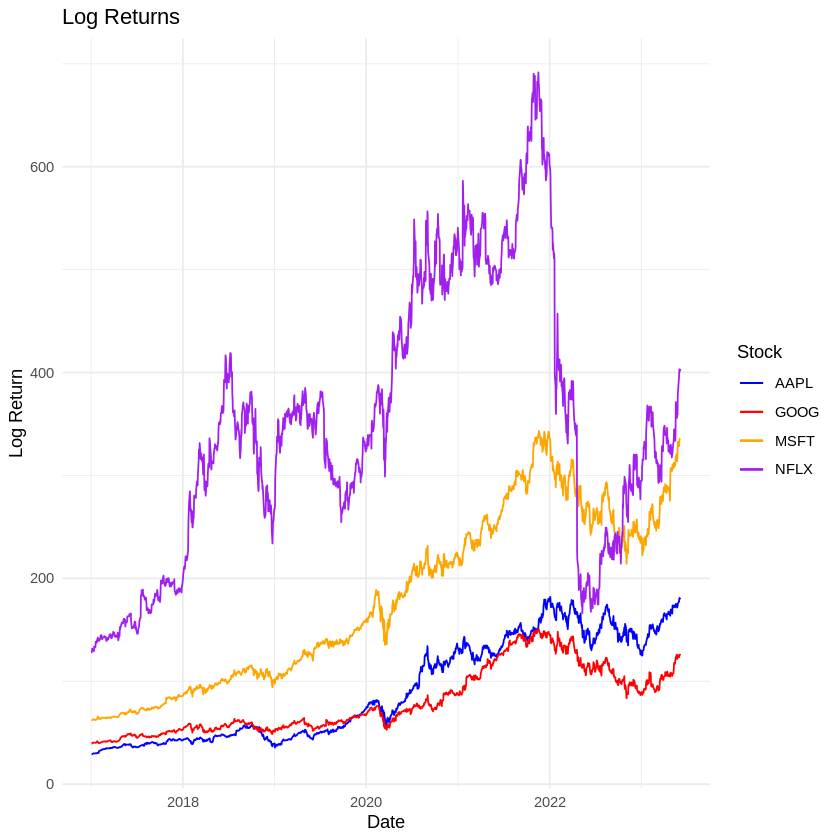

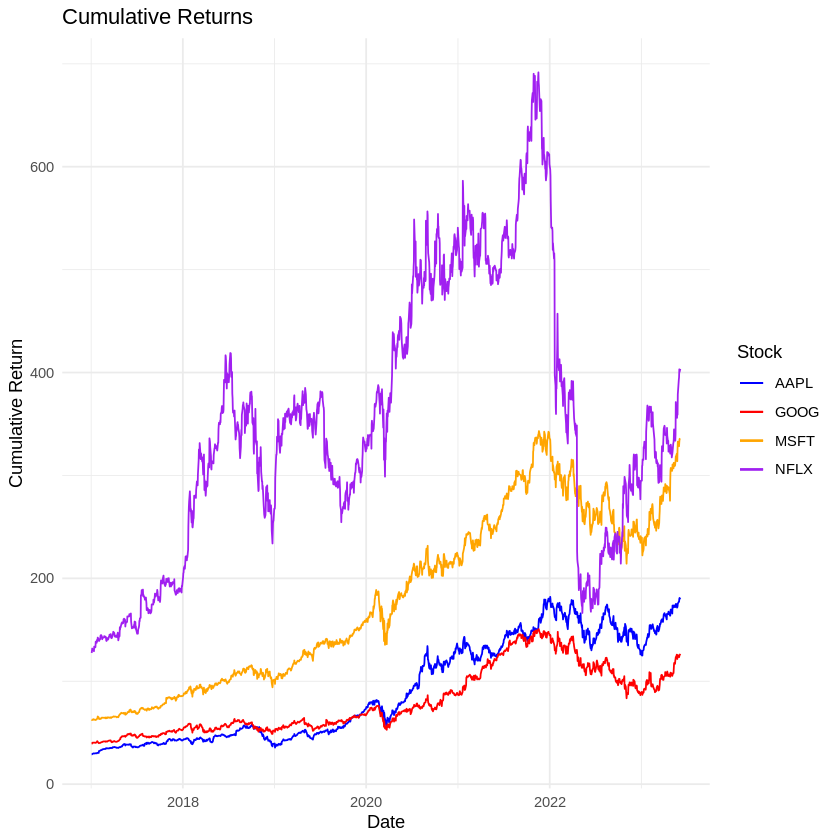

In [3]:
# Calculate log returns
log_returns_AAPL <- diff(log(AAPL))
log_returns_GOOG <- diff(log(GOOG))
log_returns_MSFT <- diff(log(MSFT))
log_returns_NFLX <- diff(log(NFLX))

# Calculate cumulative returns
cumulative_returns_AAPL <- cumprod(1 + log_returns_AAPL) - 1
cumulative_returns_GOOG <- cumprod(1 + log_returns_GOOG) - 1
cumulative_returns_MSFT <- cumprod(1 + log_returns_MSFT) - 1
cumulative_returns_NFLX <- cumprod(1 + log_returns_NFLX) - 1

# Create a dataframe for log returns
log_returns_df <- data.frame(Date = index(log_returns_AAPL),
                             AAPL = coredata(log_returns_AAPL),
                             GOOG = coredata(log_returns_GOOG),
                             MSFT = coredata(log_returns_MSFT),
                             NFLX = coredata(log_returns_NFLX))

# Create a dataframe for cumulative returns
cumulative_returns_df <- data.frame(Date = index(cumulative_returns_AAPL),
                                    AAPL = coredata(cumulative_returns_AAPL),
                                    GOOG = coredata(cumulative_returns_GOOG),
                                    MSFT = coredata(cumulative_returns_MSFT),
                                    NFLX = coredata(cumulative_returns_NFLX))

# Plot the log returns
library(ggplot2)

ggplot(log_returns_df, aes(x = Date)) +
  geom_line(aes(y = AAPL, color = "AAPL")) +
  geom_line(aes(y = GOOG, color = "GOOG")) +
  geom_line(aes(y = MSFT, color = "MSFT")) +
  geom_line(aes(y = NFLX, color = "NFLX")) +
  labs(title = "Log Returns", y = "Log Return", color = "Stock") +
  scale_color_manual(values = c(AAPL = "blue", GOOG = "red", FB = "green", MSFT = "orange", NFLX = "purple")) +
  theme_minimal()

# Plot the cumulative returns
ggplot(cumulative_returns_df, aes(x = Date)) +
  geom_line(aes(y = AAPL, color = "AAPL")) +
  geom_line(aes(y = GOOG, color = "GOOG")) +
  geom_line(aes(y = MSFT, color = "MSFT")) +
  geom_line(aes(y = NFLX, color = "NFLX")) +
  labs(title = "Cumulative Returns", y = "Cumulative Return", color = "Stock") +
  scale_color_manual(values = c(AAPL = "blue", GOOG = "red", MSFT = "orange", NFLX = "purple")) +
  theme_minimal()


Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


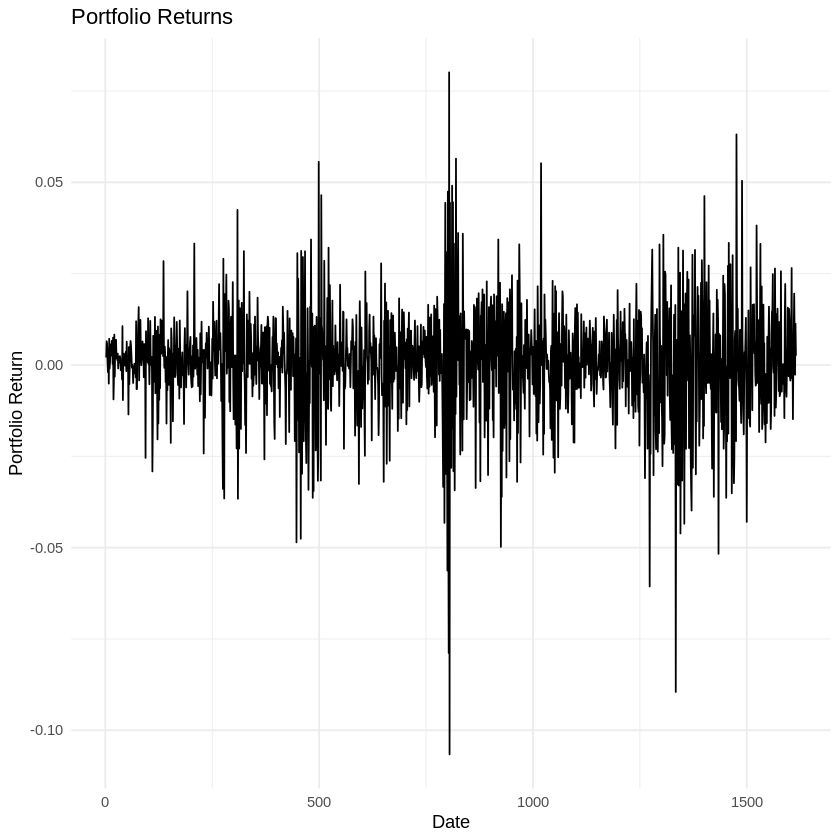

In [4]:
# Define portfolio weights
weights <- c(0.2, 0.2, 0.2, 0.2, 0.2)  # Equal weights for each stock

# Calculate the portfolio return
portfolio_returns <- rowSums(log_returns_df[, -1] * weights)

# Create a dataframe for portfolio returns
portfolio_returns_df <- data.frame(Date = index(log_returns_df),
                                   Portfolio_Return = coredata(portfolio_returns))

# Plot the portfolio returns
library(ggplot2)

ggplot(portfolio_returns_df, aes(x = Date, y = Portfolio_Return)) +
  geom_line() +
  labs(title = "Portfolio Returns", y = "Portfolio Return") +
  theme_minimal()




In [5]:
# Create a dataframe for the adjusted closing prices
closing_prices_df <- data.frame(Date = index(AAPL),
                                AAPL = coredata(AAPL),
                                GOOG = coredata(GOOG),
                                MSFT = coredata(MSFT),
                                NFLX = coredata(NFLX))

# Calculate monthly returns
library(dplyr)

portfolio_returns <- closing_prices_df %>%
  mutate(Month = format(Date, "%Y-%m")) %>%
  group_by(Month) %>%
  summarize(Portfolio_Return = sum(AAPL + GOOG + MSFT + NFLX)) %>%
  mutate(Portfolio_Return = Portfolio_Return / n())

# Print the resulting dataframe
head(portfolio_returns)



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                                                                             #
# Code in packages is not affected. It's protected by R's namespace mechanism #
# Set `options(xts.warn_dplyr_breaks_lag = FALSE)` to suppress this warning.  #
#                                      

Month,Portfolio_Return
<chr>,<dbl>
2017-01,14578.17
2017-02,14578.17
2017-03,14578.17
2017-04,14578.17
2017-05,14578.17
2017-06,14578.17


In [40]:
library(zoo)

portfolio_returns$Rolling_MA <- rollmean(portfolio_returns$Portfolio_Return, k = 20, align = "right", fill = NA)



In [41]:
portfolio_returns$Signal <- NA
portfolio_returns$Signal[portfolio_returns$Portfolio_Return > portfolio_returns$Rolling_MA] <- "Buy"
portfolio_returns$Signal[portfolio_returns$Portfolio_Return < portfolio_returns$Rolling_MA] <- "Sell"


In [ ]:
library(ggplot2)

# Plot the rolling moving average
ggplot(portfolio_returns, aes(x = Month, y = Portfolio_Return)) +
  geom_line() +
  geom_line(aes(y = Rolling_MA), color = "red") +
  labs(x = "Month", y = "Portfolio Return", title = "Rolling Moving Average of Portfolio Returns") +
  theme_minimal()


In [45]:
closing_prices_df <- data.frame(Date = index(AAPL),
                               AAPL = coredata(AAPL),
                               GOOG = coredata(GOOG),
                               MSFT = coredata(MSFT),
                               NFLX = coredata(NFLX))


In [46]:
closing_prices_df$AAPL_MA20 <- SMA(Cl(AAPL), n = 20)
closing_prices_df$GOOG_MA20 <- SMA(Cl(GOOG), n = 20)
closing_prices_df$MSFT_MA20 <- SMA(Cl(MSFT), n = 20)
closing_prices_df$NFLX_MA20 <- SMA(Cl(NFLX), n = 20)


In [ ]:
install.packages(c("quantmod", "TTR"))
library(quantmod)
library(TTR)



# Calculate the 20-day moving average for AAPL
closing_prices_df$AAPL_MA20 <- SMA(Cl(AAPL), n = 20)



# Remove rows with missing values
closing_prices_df <- na.omit(closing_prices_df)



In [55]:
library(zoo)

closing_prices_df$AAPL_SD <- rollapply(closing_prices_df$AAPL_MA20, width = 20, FUN = sd, fill = NA)


In [56]:
closing_prices_df

,Date,AAPL.Close,GOOG.Close,MSFT.Close,NFLX.Close,AAPL_MA20,GOOG_MA20,MSFT_MA20,NFLX_MA20,AAPL_SD,Signal
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,"<xts[,1]>","<xts[,1]>","<xts[,1]>","<xts[,1]>","<xts[,1]>",<lgl>
20,2017-01-31,30.3375,39.83950,64.65,140.71,29.89250,40.39524,63.1920,134.8760,NA,NA
21,2017-02-01,32.1875,39.78475,63.58,140.78,30.05000,40.41913,63.2420,135.5405,NA,NA
22,2017-02-02,32.1325,39.92650,63.17,139.20,30.20637,40.44820,63.2855,136.0300,NA,NA
23,2017-02-03,32.2700,40.07450,63.68,140.25,30.36225,40.46688,63.3545,136.4520,NA,NA
24,2017-02-06,32.5725,40.06700,63.64,140.97,30.51700,40.45485,63.3945,136.9470,NA,NA
25,2017-02-07,32.8825,40.34850,63.43,144.00,30.67375,40.45565,63.4340,137.5995,NA,NA
26,2017-02-08,33.0100,40.41900,63.34,144.74,30.83537,40.46463,63.4700,138.3420,NA,NA
27,2017-02-09,33.1050,40.47800,64.06,144.14,30.99375,40.46875,63.5135,139.0240,NA,NA
28,2017-02-10,33.0300,40.68350,64.00,144.82,31.15462,40.48703,63.5830,139.8060,NA,NA


In [61]:
closing_prices_df$Signal <- "Hold"
closing_prices_df$Signal[closing_prices_df$AAPL.Close > (closing_prices_df$AAPL_MA20 + closing_prices_df$AAPL_SD)] <- "Sell"
closing_prices_df$Signal[closing_prices_df$AAPL.Close < (closing_prices_df$AAPL_MA20 - closing_prices_df$AAPL_SD)] <- "Buy"


In [62]:
buy_sell_signals_df <- closing_prices_df[, c("Date", "Signal")]


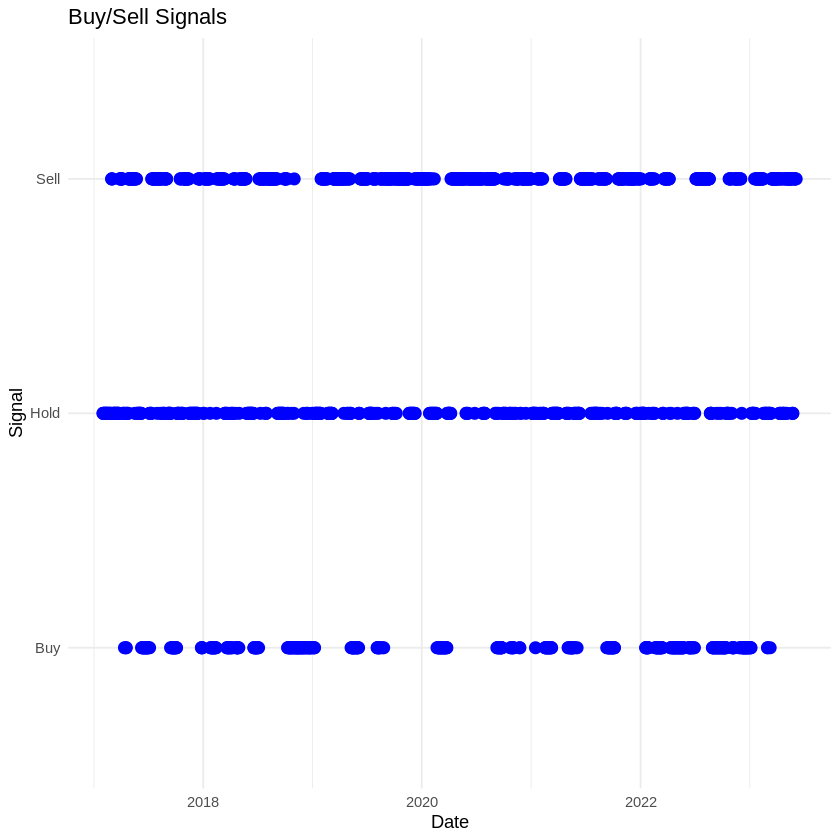

In [63]:
library(ggplot2)

ggplot(buy_sell_signals_df, aes(x = Date, y = Signal)) +
  geom_point(color = "blue", size = 3) +
  labs(x = "Date", y = "Signal", title = "Buy/Sell Signals") +
  theme_minimal()
